In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.sql import func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [6]:
# reflect an existing database into a new model
Base.prepare(autoload_with=engine)
# reflect the tables

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [26]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(precipitation, columns=['date', 'prcp in.'])
df.head()

,date,prcp in.
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


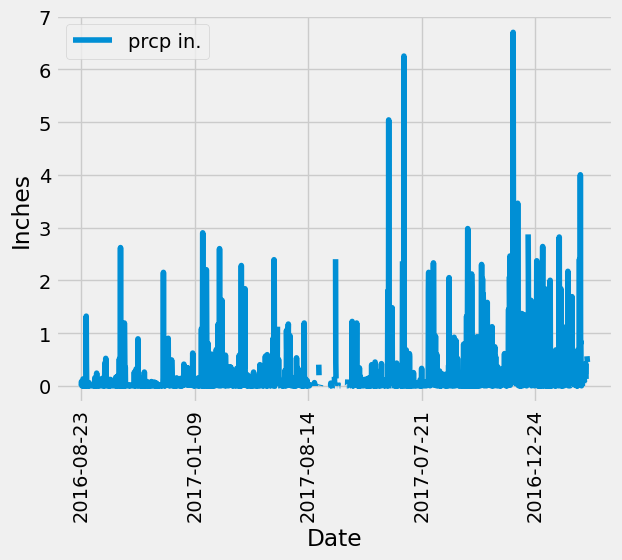

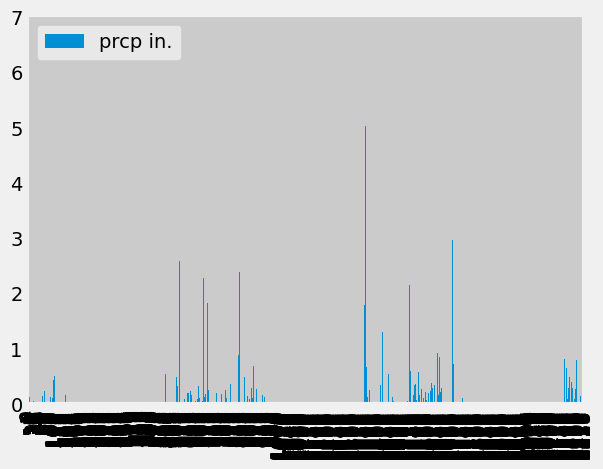

In [86]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
rain_year = session.query(measurement.date).\
    filter(measurement.date <= '2017-08-23').\
    filter(measurement.date >= '2016-08-23')

# for x in rain_year:
#     print(x)
# Perform a query to retrieve the data and precipitation scores
sel = [measurement.date,
       measurement.prcp]
precipitation = session.query(*sel).\
    filter(measurement.date <= '2017-08-23').\
    filter(measurement.date >= '2016-08-23')

# for x in precipitation:
#     print(x)


# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(precipitation, columns=['date', 'prcp in.'])
df.head()

# Sort the dataframe by date
# df_sorted = df.sort_values(by= 'date', ascending=True).reset_index().drop(columns= 'index')
# df_sorted

# Use Pandas Plotting with Matplotlib to plot the data
# df.set_index('date', inplace=True)

# plt.tight_layout()
# plt.show()
df.plot(x='date', y= 'prcp in.', rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
df.plot.bar()
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_table = df.describe()
summary_table

,prcp in.
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(station.station).count()
print(stations)

9


In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

#this is incorrect code
# active_stations = session.query(measurement.station).\
#     group_by().\
#     count(measurement.station)

# for x in active_stations:
#     print(x)

active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).\
    desc()).all()
active_stations 

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [measurement.station, 
       func.min(measurement.tobs), 
       func.max(measurement.tobs), 
       func.sum(measurement.tobs)/func.count(measurement.tobs)]
most_active_station = session.query(*sel).\
    filter(measurement.station == "USC00519281").all()

print(most_active_station)


[('USC00519281', 54.0, 85.0, 71.66378066378067)]


In [84]:
# temperature = session.query(measurement.tobs).\
#     filter(measurement.date <= '2017-08-23').\
#     filter(measurement.date >= '2016-08-23').\
#     group_by(measurement.tobs).all()

# temperature

[(58.0,),
 (59.0,),
 (60.0,),
 (61.0,),
 (62.0,),
 (63.0,),
 (64.0,),
 (65.0,),
 (66.0,),
 (67.0,),
 (68.0,),
 (69.0,),
 (70.0,),
 (71.0,),
 (72.0,),
 (73.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (80.0,),
 (81.0,),
 (82.0,),
 (83.0,),
 (84.0,),
 (85.0,),
 (87.0,)]

In [47]:
#THIS DOESN'T WORK!!! IGNORE!

# sel = [measurement.date,
#        measurement.tobs,
#        func.count(measurement.tobs)]
# temperature = session.query(*sel).\
#     filter(measurement.date <= '2017-08-23').\
#     filter(measurement.date >= '2016-08-23').\
#     group_by(measurement.tobs).all()

# print(temperature)

[('2017-04-30', 58.0, 1), ('2017-02-02', 59.0, 3), ('2017-01-08', 60.0, 6), ('2017-02-02', 61.0, 4), ('2016-12-16', 62.0, 13), ('2017-01-03', 63.0, 15), ('2017-01-06', 64.0, 23), ('2017-01-14', 65.0, 28), ('2016-12-12', 66.0, 31), ('2016-12-06', 67.0, 54), ('2016-11-29', 68.0, 56), ('2016-12-03', 69.0, 92), ('2016-12-09', 70.0, 110), ('2016-11-07', 71.0, 121), ('2016-11-11', 72.0, 125), ('2016-11-26', 73.0, 117), ('2016-11-24', 74.0, 174), ('2016-09-04', 75.0, 171), ('2016-09-06', 76.0, 210), ('2016-08-27', 77.0, 212), ('2016-08-28', 78.0, 198), ('2016-08-24', 79.0, 158), ('2016-08-25', 80.0, 156), ('2016-08-23', 81.0, 89), ('2016-09-23', 82.0, 42), ('2017-06-12', 83.0, 12), ('2016-08-26', 84.0, 6), ('2017-08-19', 85.0, 1), ('2017-05-23', 87.0, 2)]


In [53]:
# THIS DOESN'T WORK!!!!
# data = [('2017-04-30', 58.0, 1), ('2017-02-02', 59.0, 3), ('2017-01-08', 60.0, 6), ('2017-02-02', 61.0, 4), ('2016-12-16', 62.0, 13), ('2017-01-03', 63.0, 15), ('2017-01-06', 64.0, 23), ('2017-01-14', 65.0, 28), ('2016-12-12', 66.0, 31), ('2016-12-06', 67.0, 54), ('2016-11-29', 68.0, 56), ('2016-12-03', 69.0, 92), ('2016-12-09', 70.0, 110), ('2016-11-07', 71.0, 121), ('2016-11-11', 72.0, 125), ('2016-11-26', 73.0, 117), ('2016-11-24', 74.0, 174), ('2016-09-04', 75.0, 171), ('2016-09-06', 76.0, 210), ('2016-08-27', 77.0, 212), ('2016-08-28', 78.0, 198), ('2016-08-24', 79.0, 158), ('2016-08-25', 80.0, 156), ('2016-08-23', 81.0, 89), ('2016-09-23', 82.0, 42), ('2017-06-12', 83.0, 12), ('2016-08-26', 84.0, 6), ('2017-08-19', 85.0, 1), ('2017-05-23', 87.0, 2)]
# df_temps = pd.DataFrame(data, columns= ['Date', 'Temp', 'Temp Count']).drop(columns='Date')
# df_temps

,Temp,Temp Count
0,58.0,1
1,59.0,3
2,60.0,6
3,61.0,4
4,62.0,13
5,63.0,15
6,64.0,23
7,65.0,28
8,66.0,31
9,67.0,54


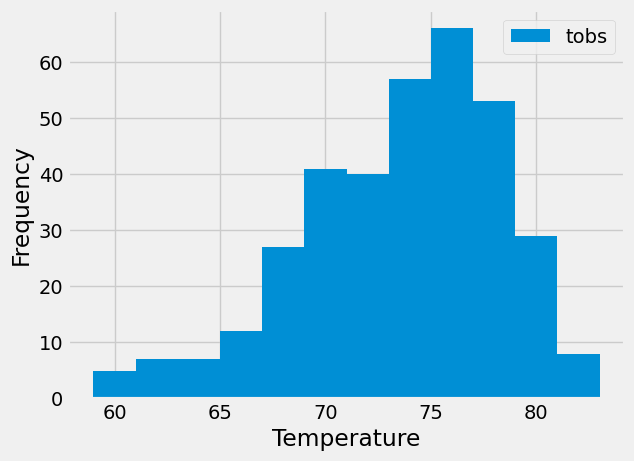

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = session.query(measurement.tobs).\
    filter(measurement.date >= dt.date(2016, 8, 23)).\
    filter(measurement.station == "USC00519281")
df = pd.DataFrame(temps)
df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

df

# Close Session

In [87]:
# Close Session
session.close()